In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import choice
import openpyxl

from imblearn.over_sampling import RandomOverSampler

In [2]:
datos = pd.read_excel('base_de_datos_1534.xlsx', sheet_name='Hoja1')
datos

,Placa,Distrito,numero_distrito,Muestra,Tm_1534,Tm_Estandar_1534,DifTmSS,DifTmSR,DifTmRR,DifTmSS_abs,DifTmSR_abs,DifTmRR_abs,Genotipo_1534,Abs_260,Abs_260_280,Abs_260_230,Criterio_260_280,Criterio_260_230
0,1,Hurlingham,135,1,82.13,82.36,0.42,0.32,-0.23,0.42,0.32,0.23,Resistente,1.5,1.90,1.71,1,3
1,1,Hurlingham,135,2,82.42,82.36,0.71,0.61,0.06,0.71,0.61,0.06,Resistente,1.3,1.90,1.79,1,3
2,1,Hurlingham,135,3,82.43,82.36,0.72,0.62,0.07,0.72,0.62,0.07,Resistente,3.5,1.94,1.94,1,2
3,1,Hurlingham,135,4,82.16,82.36,0.45,0.35,-0.20,0.45,0.35,0.20,Resistente,1.0,1.97,1.86,1,2
4,1,Hurlingham,135,5,82.27,82.36,0.56,0.46,-0.09,0.56,0.46,0.09,Resistente,3.5,1.90,2.00,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,Pergamino,81,10,82.36,82.34,0.02,-0.05,-0.16,0.02,0.05,0.16,Sensible,2.1,2.01,2.06,1,1
153,2,Pergamino,81,11,82.47,82.41,0.13,0.06,-0.05,0.13,0.06,0.05,Heterocigoto,5.1,2.02,2.12,1,1
154,2,Pergamino,81,12,82.42,82.41,0.08,0.01,-0.10,0.08,0.01,0.10,Heterocigoto,3.9,2.07,2.22,1,1
155,2,Pergamino,81,14,82.42,82.41,0.08,0.01,-0.10,0.08,0.01,0.10,Heterocigoto,1.3,1.90,2.09,1,1


In [3]:
datos['Genotipo_1534'].value_counts()

Genotipo_1534
Resistente      93
Heterocigoto    57
Sensible         7
Name: count, dtype: int64

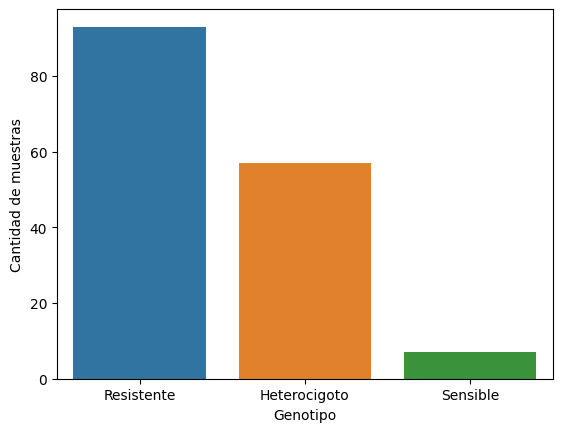

In [4]:
sns.countplot(x=datos['Genotipo_1534'])

# Agregar etiquetas a los ejes
plt.xlabel('Genotipo')  # Etiqueta para el eje X
plt.ylabel('Cantidad de muestras')  # Etiqueta para el eje Y

# Mostrar el gráfico
plt.show()

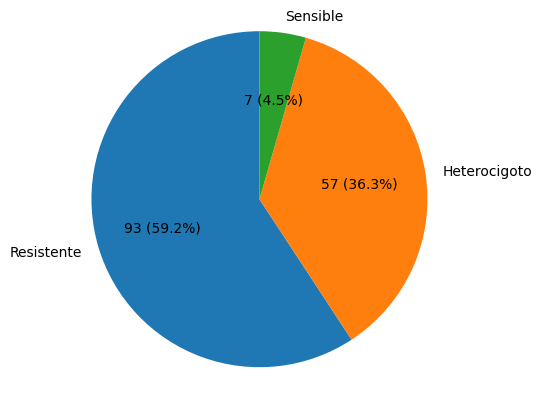

In [5]:
# Obtén los conteos de cada categoría en 'Genotipo_1016'
conteos_genotipo = datos['Genotipo_1534'].value_counts()

plt.pie(conteos_genotipo, labels=conteos_genotipo.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(conteos_genotipo) / 100, p), startangle=90)

# Ajustar el diseño para que la torta se vea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()

In [6]:
# datos0 = datos[datos.Genotipo_1016 == "Sensible"].sample(n=12, random_state=20)
# datos1 = datos[datos.Genotipo_1016 == "Heterocigoto"].sample(n=12, random_state=20)
# datos2 = datos[datos.Genotipo_1016 == "Resistente"].sample(n=12, random_state=20)
# datos_equilibrados = pd.concat([datos0, datos1])
# datos_equilibrados = pd.concat([datos_equilibrados, datos2])

In [7]:
# sns.countplot(x=datos_equilibrados['Genotipo_1016'])
# plt.show()

In [8]:
base_test = pd.read_excel('base_test_1534.xlsx', sheet_name='Hoja1')
base_test

,Placa,Distrito,numero_distrito,Muestra,Tm_1534,Tm_Estandar_1534,DifTmSS,DifTmSR,DifTmRR,DifTmSS_abs,DifTmSR_abs,DifTmRR_abs,Genotipo_1534,Abs_260,Abs_260_280,Abs_260_230,Criterio_260_280,Criterio_260_230
0,3,Pergamino,81,17,82.34,82.37,-0.03,-0.18,-0.68,0.03,0.18,0.68,Sensible,4.6,2.04,2.17,1,1
1,3,Pergamino,81,18,82.42,82.52,0.05,-0.10,-0.60,0.05,0.10,0.60,Heterocigoto,3.4,1.98,2.07,1,1
2,3,Pergamino,81,19,82.37,82.37,0.00,-0.15,-0.65,0.00,0.15,0.65,Sensible,3.4,2.02,2.08,1,1
3,3,Pergamino,81,20,82.42,82.52,0.05,-0.10,-0.60,0.05,0.10,0.60,Heterocigoto,2.8,1.95,1.89,1,1
4,3,Pergamino,81,21,83.11,83.02,0.74,0.59,0.09,0.74,0.59,0.09,Resistente,1.4,1.90,1.96,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,3,Escobar,116,4,82.28,82.37,-0.09,-0.24,-0.74,0.09,0.24,0.74,Sensible,3.1,2.02,2.34,1,1
78,3,Escobar,116,5,83.00,83.02,0.63,0.48,-0.02,0.63,0.48,0.02,Resistente,1.6,2.06,2.09,1,1
79,3,Escobar,116,6,83.11,83.02,0.74,0.59,0.09,0.74,0.59,0.09,Resistente,8.2,2.14,2.08,4,1
80,3,Escobar,116,7,83.11,83.02,0.74,0.59,0.09,0.74,0.59,0.09,Resistente,7.1,2.02,2.33,1,1


In [9]:
base_test['Genotipo_1534'].value_counts()

Genotipo_1534
Heterocigoto    41
Resistente      34
Sensible         7
Name: count, dtype: int64

In [10]:
# X = datos[['Tm_1534', 'Tm_Estandar_1534', 'Resul1534', 'Resul1534_abs', 'DifTmSS', 'DifTmR', 'DifTmH', 'DifTmSS_abs', 'DifTmR_abs', 'DifTmH_abs']]
X = datos[['Tm_1534', 'Tm_Estandar_1534', 'DifTmSS', 'DifTmSR', 'DifTmRR', 'DifTmSS_abs', 'DifTmSR_abs', 'DifTmRR_abs', 'Abs_260', 'Abs_260_230', 'Abs_260_230', 'Criterio_260_280', 'Criterio_260_230']]

# X = datos[['Tm_1016', 'Resul1016', 'Resul1016_abs']]
y = datos['Genotipo_1534'] # Nos quedamos sólo con el target

In [11]:
from imblearn.over_sampling import SMOTE

# Inicializar el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento para evitar data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Concatenar los datos equilibrados
datos_equilibrados = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), pd.Series(y_train_resampled, name='Genotipo_1534')], axis=1)

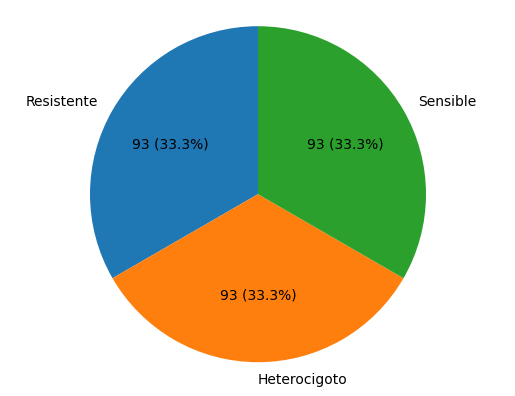

In [12]:
# Obtén los conteos de cada categoría en 'Genotipo_1016'
conteos_genotipo_resampleo = datos_equilibrados['Genotipo_1534'].value_counts()

plt.pie(conteos_genotipo_resampleo, labels=conteos_genotipo_resampleo.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(conteos_genotipo_resampleo) / 100, p), startangle=90)

# Ajustar el diseño para que la torta se vea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()

In [13]:
datos_equilibrados['Genotipo_1534'].value_counts()

Genotipo_1534
Resistente      93
Heterocigoto    93
Sensible        93
Name: count, dtype: int64

In [14]:
# from sklearn.model_selection import train_test_split

# # 80 % de entrenamiento, 20 % de testeo
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

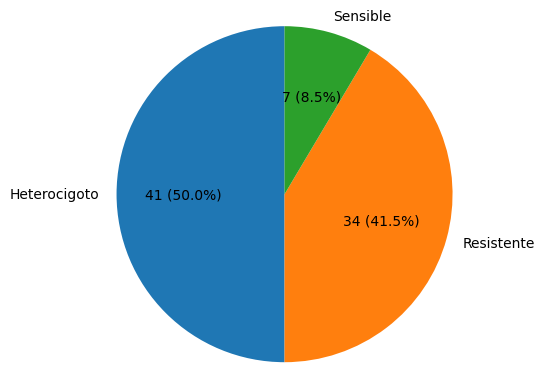

In [15]:
# Obtén los conteos de cada categoría en 'Genotipo_1016'
conteos_genotipo_test = base_test['Genotipo_1534'].value_counts()

# Crear el gráfico de torta
plt.pie(conteos_genotipo_test, labels=conteos_genotipo_test.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(conteos_genotipo_test) / 100, p), startangle=90)

# Ajustar el diseño para que la torta se vea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()

----

### Árbol de decisión

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [17]:
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
dtree = DecisionTreeClassifier(random_state=42, criterion = 'entropy')
# param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# # Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
# grid_search = GridSearchCV(dtree, param_grid=param_grid, cv=10, return_train_score=True)
# grid_search.fit(X, y)

# # Imprimir los resultados
# print("Mejores hiperparámetros encontrados:")
# print(grid_search.best_params_)
# print("Mejor puntuación de validación cruzada:")
# print(grid_search.best_score_)

best_dtree = dtree.fit(X_train_resampled,y_train_resampled)

In [18]:
# Modelo decision tree con parametros optimizados
# best_dtree = grid_search.best_estimator_

In [19]:
# X_test = base_test[['Tm_1534', 'Tm_Estandar_1534', 'Resul1534', 'Resul1534_abs', 'DifTmSS', 'DifTmR', 'DifTmH', 'DifTmSS_abs', 'DifTmR_abs', 'DifTmH_abs']]
X_test = base_test[['Tm_1534', 'Tm_Estandar_1534', 'DifTmSS', 'DifTmSR', 'DifTmRR', 'DifTmSS_abs', 'DifTmSR_abs', 'DifTmRR_abs', 'Abs_260', 'Abs_260_230', 'Abs_260_230', 'Criterio_260_280', 'Criterio_260_230']]

# X_test = base_test[['Tm_1016', 'Resul1016', 'Resul1016_abs']]

In [20]:
y_test = base_test[['Genotipo_1534']]

In [21]:
# Predecimos con los hiperparámetros optimizados
y_test_pred_dtree = best_dtree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
print('El accuracy en test es:', accuracy_score(y_test,y_test_pred_dtree))

El accuracy en test es: 0.4878048780487805


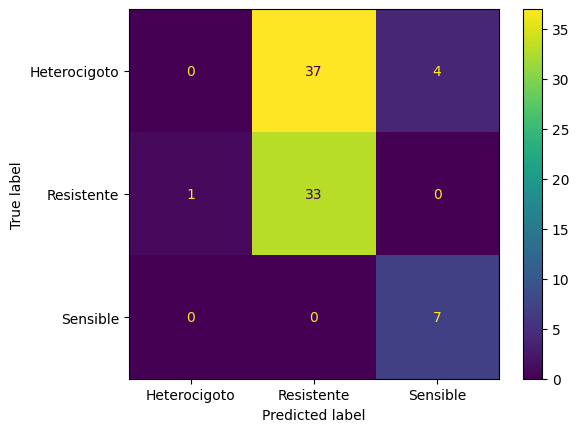

In [23]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_test_pred_dtree,labels=best_dtree.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_dtree.classes_).plot()

In [24]:
from sklearn.model_selection import cross_val_score

scores_dtree = cross_val_score(best_dtree, X_train_resampled, y_train_resampled, scoring='accuracy')
print("")
print("Accuracy scores for each fold:", scores_dtree*100)
print("Mean accuracy: ", scores_dtree.mean()*100)
print("Standard deviation: ", scores_dtree.std()*100)


Accuracy scores for each fold: [ 96.42857143  96.42857143  96.42857143  98.21428571 100.        ]
Mean accuracy:  97.5
Standard deviation:  1.4285714285714275


In [25]:
# Visualizacion del arbol
from sklearn import tree

In [26]:
r = export_text(best_dtree, feature_names=list(X_train_resampled.columns))
print(r)

|--- DifTmSS <= 0.05
|   |--- class: Sensible
|--- DifTmSS >  0.05
|   |--- DifTmSS_abs <= 0.38
|   |   |--- Tm_Estandar_1534 <= 82.47
|   |   |   |--- class: Heterocigoto
|   |   |--- Tm_Estandar_1534 >  82.47
|   |   |   |--- class: Resistente
|   |--- DifTmSS_abs >  0.38
|   |   |--- DifTmSS_abs <= 0.47
|   |   |   |--- Abs_260 <= 3.30
|   |   |   |   |--- class: Resistente
|   |   |   |--- Abs_260 >  3.30
|   |   |   |   |--- class: Heterocigoto
|   |   |--- DifTmSS_abs >  0.47
|   |   |   |--- class: Resistente



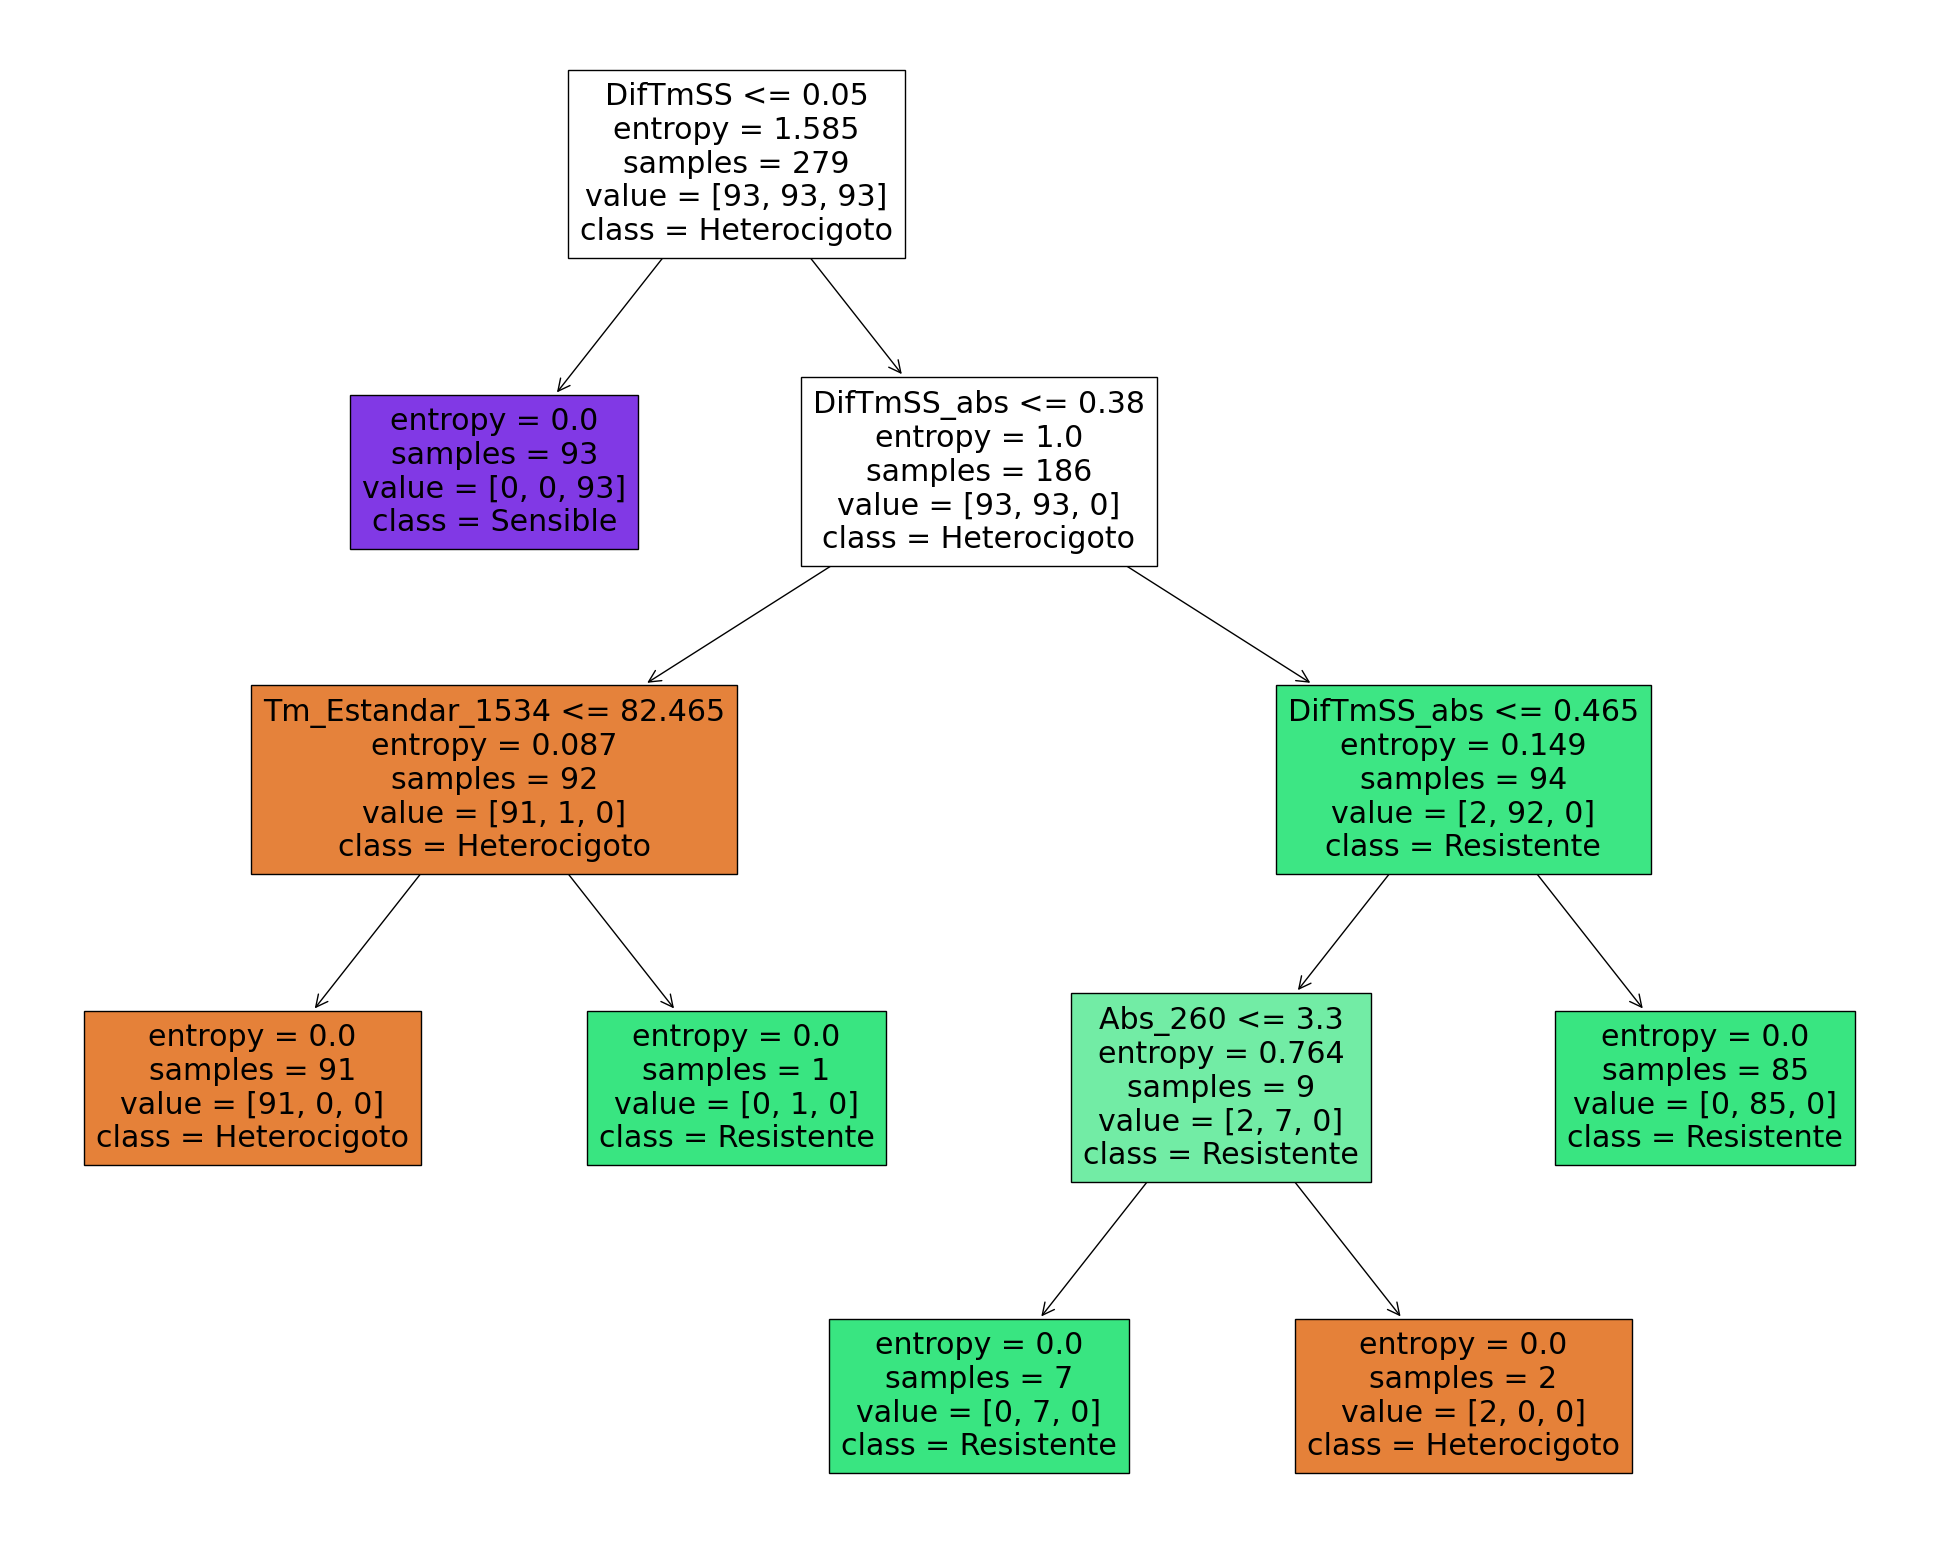

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_dtree, 
                   feature_names = X_train_resampled.columns,  
                   class_names=list(map(str, best_dtree.classes_)),
                   filled = True)

# Guarda la figura en un archivo PNG
fig.savefig('arbol_decision.png')

In [28]:
# Prediccion y evaluacion
model_predictions_proba = best_dtree.predict_proba(X_test)

Text(0.5, 1.0, 'Probability Density Plot')

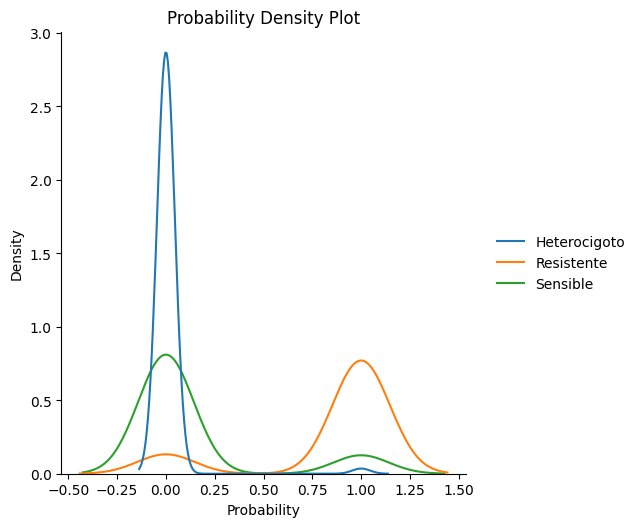

In [29]:
# Crear un DataFrame con las predicciones de probabilidad
df_prob_dtree = pd.DataFrame(model_predictions_proba, columns=['Heterocigoto', 'Resistente', 'Sensible'])

sns.displot(df_prob_dtree, kind="kde")

# Agregar etiquetas al gráfico
plt.xlabel("Probability")
plt.ylabel("Density")
plt.title("Probability Density Plot")

In [30]:
# Matriz de confusión
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test, y_test_pred_dtree))

# True Positives  ---  False Negatives

# False Positives ---  True Negatives

[[ 0 37  4]
 [ 1 33  0]
 [ 0  0  7]]


* Con la métrica de precisión (precision) podemos medir la calidad del modelo de machine learning en tareas de clasificación. En el ejemplo, se refiere a que la precisión es la respuesta a la pregunta ¿Qué porcentaje de los genotipos que el modelo predijo como heterocigotos, realmente lo hicieron?
* La métrica de exhaustividad (recall) nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar. En el ejemplo, se refiere a que la exhaustividad es la respuesta a la pregunta ¿qué porcentaje de los genotipos que son heterocigotos somos capaces de identificar?

In [32]:
print(classification_report(y_test,y_test_pred_dtree))

              precision    recall  f1-score   support

Heterocigoto       0.00      0.00      0.00        41
  Resistente       0.47      0.97      0.63        34
    Sensible       0.64      1.00      0.78         7

    accuracy                           0.49        82
   macro avg       0.37      0.66      0.47        82
weighted avg       0.25      0.49      0.33        82



In [33]:
df_pred_model_final = pd.DataFrame()

In [34]:
df_pred_model_final["target"] = y_test_pred_dtree
df_pred_model_final["prob"] = list(model_predictions_proba)
df_pred_model_final["prob"] = df_pred_model_final["prob"].astype(str)
df_pred_model_final['Tm_1534'] = list(X_test['Tm_1534'])

In [35]:
df_pred_model_final

,target,prob,Tm_1534
0,Sensible,[0. 0. 1.],82.34
1,Resistente,[0. 1. 0.],82.42
2,Sensible,[0. 0. 1.],82.37
3,Resistente,[0. 1. 0.],82.42
4,Resistente,[0. 1. 0.],83.11
...,...,...,...
77,Sensible,[0. 0. 1.],82.28
78,Resistente,[0. 1. 0.],83.00
79,Resistente,[0. 1. 0.],83.11
80,Resistente,[0. 1. 0.],83.11


In [36]:
# Separar la columna 'prob' en tres columnas
df_pred_model_final[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_final['prob'].str.strip('[]').str.split(expand=True)

# Convertir las nuevas columnas a números
df_pred_model_final[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_final[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']].astype(float)

# Eliminar la columna original 'prob'
df_pred_model_final.drop('prob', axis=1, inplace=True)

# Mostrar el DataFrame resultante
df_pred_model_final

,target,Tm_1534,prob_heterocigoto,prob_resistente,prob_sensible
0,Sensible,82.34,0.0,0.0,1.0
1,Resistente,82.42,0.0,1.0,0.0
2,Sensible,82.37,0.0,0.0,1.0
3,Resistente,82.42,0.0,1.0,0.0
4,Resistente,83.11,0.0,1.0,0.0
...,...,...,...,...,...
77,Sensible,82.28,0.0,0.0,1.0
78,Resistente,83.00,0.0,1.0,0.0
79,Resistente,83.11,0.0,1.0,0.0
80,Resistente,83.11,0.0,1.0,0.0


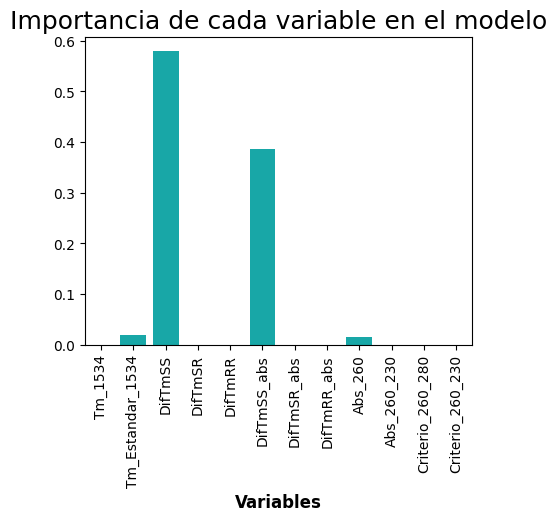

In [37]:
imp_variables = dtree.feature_importances_

plt.figure(figsize=(5, 4))
sns.barplot(x=X_train_resampled.columns, y=imp_variables, color="c")
plt.xlabel("Variables", fontweight="black", fontsize=12)
plt.title("Importancia de cada variable en el modelo", fontsize=18, color="black")
plt.xticks(rotation=90, size=10)
plt.show()

In [38]:
# df_pred_model_final.to_excel('prediccion.xlsx', index=False)  

----------- 

### Bosque Aleatorio

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Inicializar el clasificador de bosque aleatorio
clf = RandomForestClassifier(n_estimators=150, random_state=42)

# # Optimizacion de parametros
# from sklearn.model_selection import GridSearchCV

# # Definir los hiperparámetros y sus posibles valores
# param_grid = {
#     'n_estimators': [10,25,50],
#     'max_depth' : [5,10,15],
#     'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
#     'min_samples_split': [2,4,6],
#     'min_samples_leaf': [1,2,4],
# }

# # Crear el objeto GridSearchCV
# grid_search_random = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con GridSearchCV
clf.fit(X_train_resampled, y_train_resampled)

# # Obtener el modelo con el mejor rendimiento
# best_model_random = grid_search_random.best_estimator_

RandomForestClassifier(n_estimators=150, random_state=42)

In [41]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

In [42]:
# Métrica - radio entre aciertos y cantidad total de predicciones
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9512195121951219

In [43]:
from sklearn.model_selection import cross_val_score

scores_random = cross_val_score(clf, X_train_resampled, y_train_resampled, scoring='accuracy')
print("")
print("Accuracy scores for each fold:", scores_random*100)
print("Mean accuracy: ", scores_random.mean()*100)
print("Standard deviation: ", scores_random.std()*100)


Accuracy scores for each fold: [ 98.21428571  96.42857143  96.42857143  98.21428571 100.        ]
Mean accuracy:  97.85714285714285
Standard deviation:  1.3363062095621208


In [44]:
# Prediccion y evaluacion
model_predictions_bosque = clf.predict_proba(X_test)

Text(0.5, 1.0, 'Probability Density Plot')

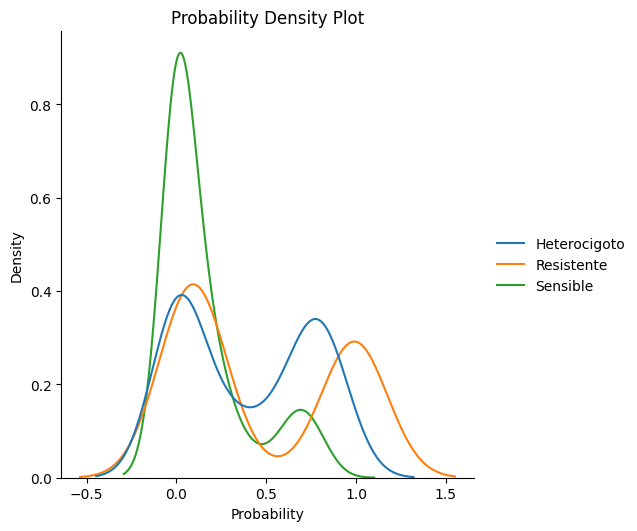

In [45]:
df_prob_random = pd.DataFrame(model_predictions_bosque, columns=['Heterocigoto', 'Resistente', 'Sensible'])
sns.displot(df_prob_random, kind="kde")

# Agregar etiquetas al gráfico
plt.xlabel("Probability")
plt.ylabel("Density")
plt.title("Probability Density Plot")

In [46]:
df_pred_model_bosque = pd.DataFrame()
df_pred_model_bosque["target"] = y_pred
df_pred_model_bosque["prob"] = list(model_predictions_bosque)
df_pred_model_bosque["prob"] = df_pred_model_bosque["prob"].astype(str)
df_pred_model_bosque['Tm_1534'] = list(X_test['Tm_1534'])
df_pred_model_bosque

,target,prob,Tm_1534
0,Sensible,[0.3 0.01333333 0.68666667],82.34
1,Heterocigoto,[0.54 0.06666667 0.39333333],82.42
2,Sensible,[0.24666667 0.02 0.73333333],82.37
3,Heterocigoto,[0.49333333 0.08 0.42666667],82.42
4,Resistente,[0. 1. 0.],83.11
...,...,...,...
77,Sensible,[0.29333333 0.02 0.68666667],82.28
78,Resistente,[0.01333333 0.98666667 0. ],83.00
79,Resistente,[0.00666667 0.99333333 0. ],83.11
80,Resistente,[0.00666667 0.99333333 0. ],83.11


In [47]:
# Separar la columna 'prob' en tres columnas
df_pred_model_bosque[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_bosque['prob'].str.strip('[]').str.split(expand=True)

# Convertir las nuevas columnas a números
df_pred_model_bosque[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_bosque[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']].astype(float)

# Eliminar la columna original 'prob'
df_pred_model_bosque.drop('prob', axis=1, inplace=True)

# Mostrar el DataFrame resultante
df_pred_model_bosque

,target,Tm_1534,prob_heterocigoto,prob_resistente,prob_sensible
0,Sensible,82.34,0.300000,0.013333,0.686667
1,Heterocigoto,82.42,0.540000,0.066667,0.393333
2,Sensible,82.37,0.246667,0.020000,0.733333
3,Heterocigoto,82.42,0.493333,0.080000,0.426667
4,Resistente,83.11,0.000000,1.000000,0.000000
...,...,...,...,...,...
77,Sensible,82.28,0.293333,0.020000,0.686667
78,Resistente,83.00,0.013333,0.986667,0.000000
79,Resistente,83.11,0.006667,0.993333,0.000000
80,Resistente,83.11,0.006667,0.993333,0.000000


In [48]:
# df_pred_model_bosque.to_excel('df_pred_model_bosque.xlsx', index=False)

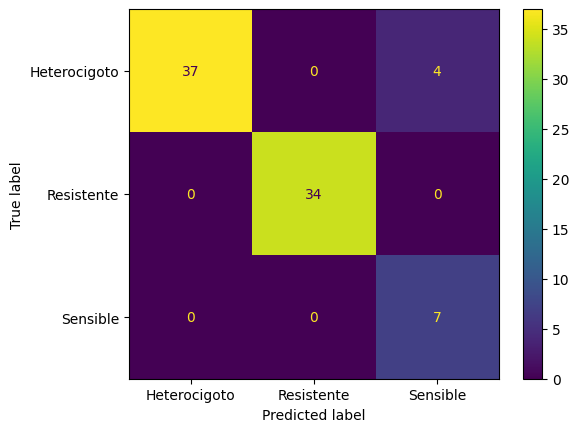

In [49]:
cm_random = confusion_matrix(y_test,y_pred,labels=['Heterocigoto', 'Resistente', 'Sensible'])
ConfusionMatrixDisplay(cm_random, display_labels=['Heterocigoto', 'Resistente', 'Sensible']).plot()

In [50]:
print(confusion_matrix(y_test, y_pred))

# True Positives  ---  False Negatives

# False Positives ---  True Negatives

[[37  0  4]
 [ 0 34  0]
 [ 0  0  7]]


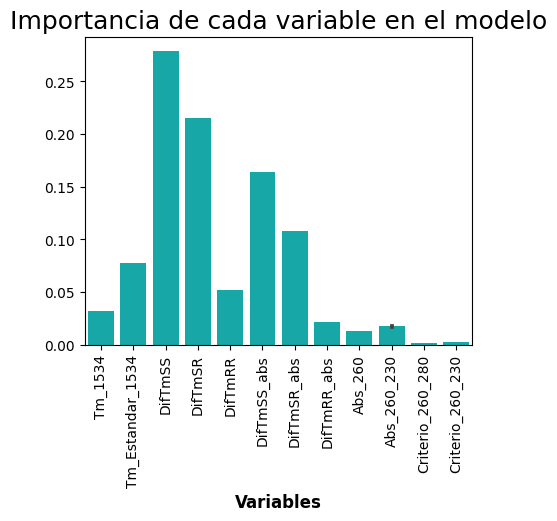

In [51]:
imp_variables = clf.feature_importances_

plt.figure(figsize=(5, 4))
sns.barplot(x=X_train_resampled.columns, y=imp_variables, color="c")
plt.xlabel("Variables", fontweight="black", fontsize=12)
plt.title("Importancia de cada variable en el modelo", fontsize=18, color="black")
plt.xticks(rotation=90, size=10)
plt.show()

---